In [116]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [117]:

im=cv2.imread('elephant.jpg')# it read image in bgr format but matplot displays image in rgb format

#will change the pixels accordingly i.e. converting color
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)


In [118]:
print(im.shape)
#330 px X 500 px with 3 as the depth

(330, 500, 3)


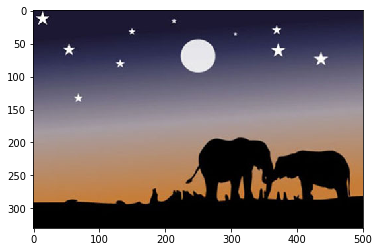

In [119]:
plt.imshow(im)
plt.show()


In [104]:
#flatteing of each channel of image or reshape the image into linear array
#channel basically means R,B and G

In [120]:
all_pixels=im.reshape((im.shape[0]*im.shape[1],3))#3 means creating 3 linear arrays  because of 3 channels.(i.e. one channel or linear array for R, 2nd channel for G and 3rd linear array for B.)
print(all_pixels.shape)

(165000, 3)


In [121]:
#k-means

from sklearn.cluster import KMeans

In [122]:
#specify the number of dominant colors that you want to have for your image.
dominant_colors=4
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [123]:
centers=km.cluster_centers_
#These are the RGB values that our algorithm has find out for 4 dominant colors

    

In [124]:
#converting cluster centers RGB values to integers.
centers=np.array(centers,dtype='uint8')#beacuse we want numbers between 0-255 which can be represented using 8 bit integers.

In [125]:
print(centers)

[[175 145 128]
 [  1   0   1]
 [ 38  35  64]
 [ 99  95 118]]


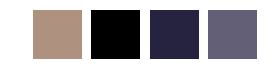

In [126]:
#plotting these colors
i=1

plt.figure(0,figsize=(4,2))

colors=[]

for each_color in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_color)
    
    #color swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_color
    
    plt.imshow(a)

plt.show()

In [91]:
#segmenting our original image


In [92]:
#we will try to map every pixel with some value

In [127]:
new_img=np.zeros((im.shape[0]*im.shape[1],3),dtype="uint8")


In [128]:
print(new_img.shape)
#km.labels_?
print(km.labels_)
print(colors)#colo->r0,1,2,3

(165000, 3)
[2 2 2 ... 1 1 1]
[array([175, 145, 128], dtype=uint8), array([1, 0, 1], dtype=uint8), array([38, 35, 64], dtype=uint8), array([ 99,  95, 118], dtype=uint8)]


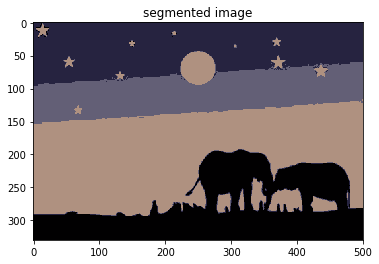

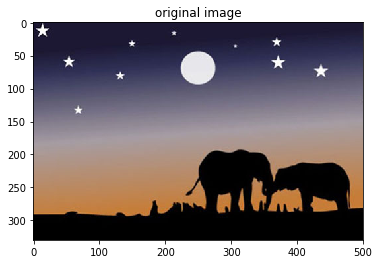

In [129]:
for i in range(new_img.shape[0]):
    #finding mapped color(using labels_ which was given by k means clustering.)
    new_img[i]= colors[km.labels_[i]]
    
    #reshaping new_img into original image.
    #original shape is im.shape

new_img=new_img.reshape((im.shape))

plt.title("segmented image")
plt.imshow(new_img)
plt.show()
plt.title("original image")
plt.imshow(im)
plt.show()


In [72]:
#extracting the elephant

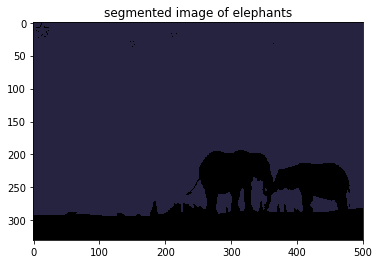

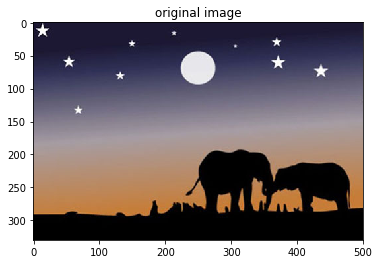

In [131]:
#extracting the black color
new_img_elephant=np.zeros((im.shape[0]*im.shape[1],3),dtype="uint8")



for i in range(new_img_elephant.shape[0]):
    #finding mapped color(using labels_ which was given by k means clustering.)
    if(km.labels_[i]!=1):
        new_img_elephant[i]= colors[km.labels_[0]]
    else:
        new_img_elephant[i]= colors[km.labels_[i]]
    
    #reshaping new_img into original image.
    #original shape is im.shape

new_img_elephant=new_img_elephant.reshape((im.shape))

plt.title("segmented image of elephants")
plt.imshow(new_img_elephant)
plt.show()
plt.title("original image")
plt.imshow(im)
plt.show()
